In [3]:
%pip install polars --quiet
%pip install matplotlib --quiet
%pip install seaborn --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np

In [5]:
input_url = "s3://market-data-dev-142571790518/processed/market_prices"

In [6]:
df_raw = pd.read_parquet(input_url)

# Start from here

In [5]:
df = df_raw.copy()

In [6]:
df.sort_values(by=["processed_timestamp"], inplace=True)
df.reset_index(drop=True, inplace=True)
df["processed_timestamp"] = pd.to_datetime(df["processed_timestamp"])

# Let's check out the data

In [20]:
display(df.head())

,adjusted_price,average_price,type_id,processed_timestamp,source_path,year,month,day,hour,day_of_week,is_weekend
0,0.000000,35847058.82,43691,2025-04-05 22:00:00,raw/api-data/prices/year=2025/month=04/day=05/...,2025,4,5,22,Saturday,1
1,31754.525508,26529.13,11724,2025-04-05 22:00:00,raw/api-data/prices/year=2025/month=04/day=05/...,2025,4,5,22,Saturday,1
2,0.000000,2239912.73,34719,2025-04-05 22:00:00,raw/api-data/prices/year=2025/month=04/day=05/...,2025,4,5,22,Saturday,1
3,18623.491710,19080.17,11695,2025-04-05 22:00:00,raw/api-data/prices/year=2025/month=04/day=05/...,2025,4,5,22,Saturday,1
4,23647.734022,22247.52,11694,2025-04-05 22:00:00,raw/api-data/prices/year=2025/month=04/day=05/...,2025,4,5,22,Saturday,1


In [21]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 541612 rows and 11 columns.


In [22]:
# Check for missing values
print("Missing values per column:")
print(df.isna().sum())

# Percentage of missing values
missing_percentage = df.isna().mean() * 100
print("Percentage of missing values:")
print(missing_percentage)

Missing values per column:
adjusted_price             0
average_price          72168
type_id                    0
processed_timestamp        0
source_path                0
year                       0
month                      0
day                        0
hour                       0
day_of_week                0
is_weekend                 0
dtype: int64
Percentage of missing values:
adjusted_price          0.000000
average_price          13.324668
type_id                 0.000000
processed_timestamp     0.000000
source_path             0.000000
year                    0.000000
month                   0.000000
day                     0.000000
hour                    0.000000
day_of_week             0.000000
is_weekend              0.000000
dtype: float64


In [23]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
adjusted_price,541612.0,173622087.38483,0.0,0.0,3478.791438,4941223.222364,122413205771.613205,2588777868.034657
average_price,469444.0,29650683.426046,0.01,130000.0,3065513.33,45932926.83,114637317.075,43819961.986906
type_id,541612.0,33263.318346,18.0,15817.0,30370.5,46866.0,87840.0,22593.199287
processed_timestamp,541612,2025-04-14 15:41:09.933457664,2025-04-05 22:00:00,2025-04-09 22:00:00,2025-04-14 10:00:00,2025-04-18 22:00:00,2025-04-23 10:00:00,NaN
is_weekend,541612.0,0.305545,0.0,0.0,0.0,1.0,1.0,0.460638


In [24]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


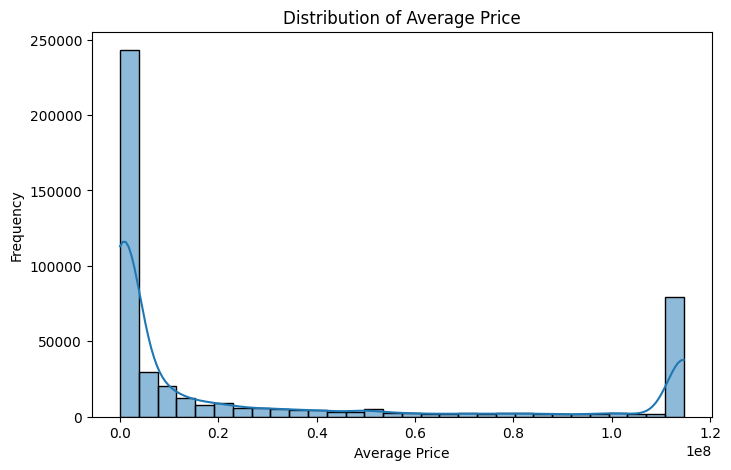

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of average_price
plt.figure(figsize=(8, 5))
sns.histplot(df['average_price'], kde=True, bins=30)
plt.title("Distribution of Average Price")
plt.xlabel("Average Price")
plt.ylabel("Frequency")
plt.show()

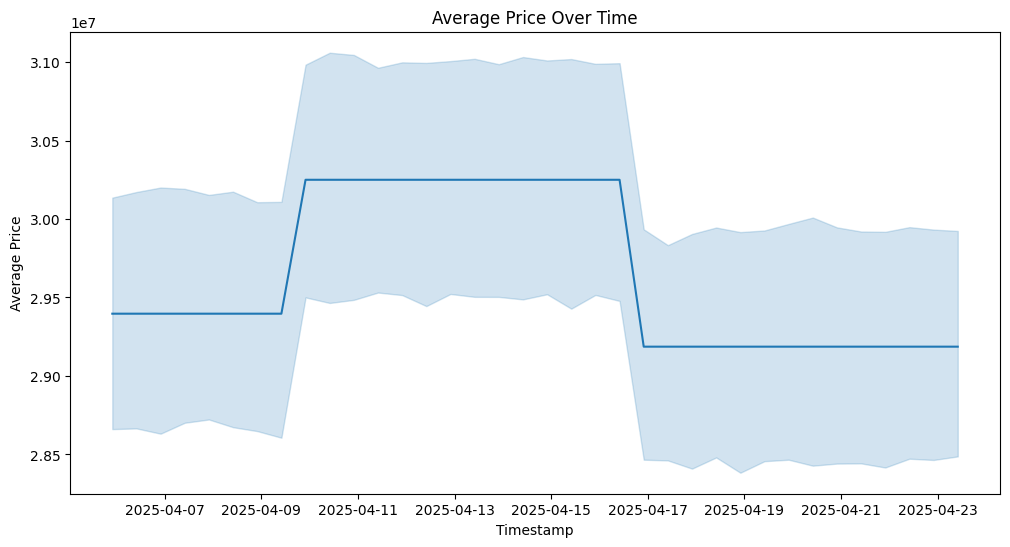

In [26]:
# Convert processed_timestamp to datetime if not already
df['processed_timestamp'] = pd.to_datetime(df['processed_timestamp'])

# Plot average price over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='processed_timestamp', y='average_price')
plt.title("Average Price Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Average Price")
plt.show()


In [27]:
df["processed_timestamp"] = pd.to_datetime(df["processed_timestamp"])
df['day_of_week'] = df["processed_timestamp"].dt.day_of_week # 0 = Monday, 6 = Sunday
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # 1 if weekend, 0 otherwise

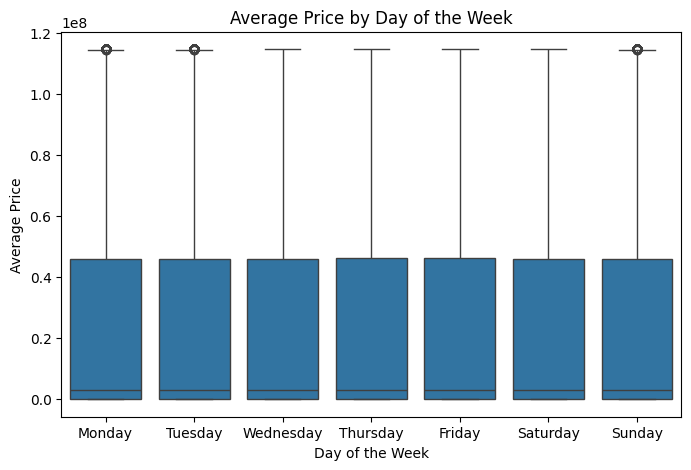

In [28]:

# Check for seasonality (e.g., day of the week)
df['day_of_week'] = df['processed_timestamp'].dt.day_name()
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='day_of_week', y='average_price', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Average Price by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Price")
plt.show()

Top 5 type_ids by average price:
type_id
33561    1.146373e+08
15110    1.146373e+08
15020    1.146373e+08
15024    1.146373e+08
15026    1.146373e+08
Name: average_price, dtype: float64


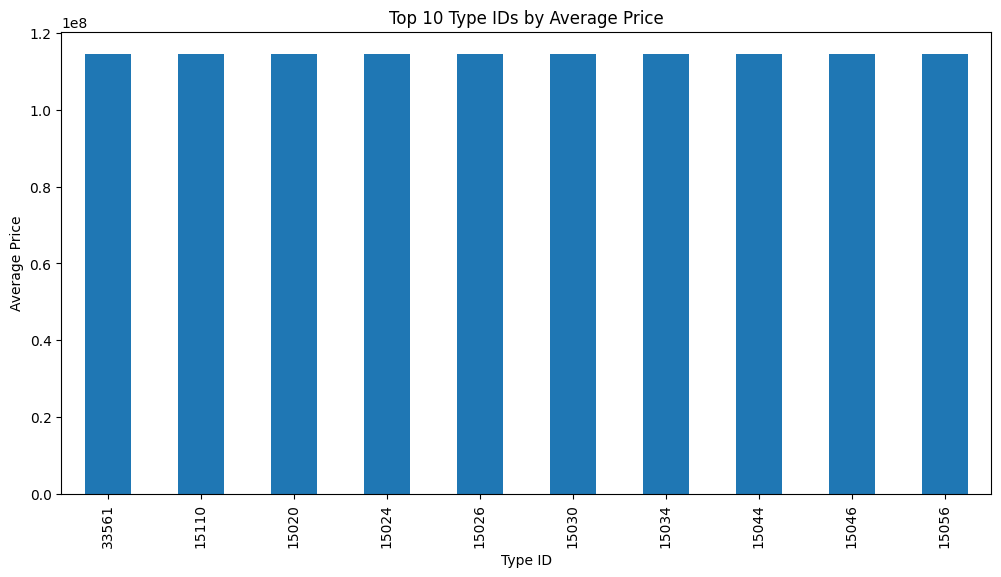

In [29]:
# Average price by type_id
type_id_avg_price = df.groupby('type_id')['average_price'].mean().sort_values(ascending=False)
print("Top 5 type_ids by average price:")
print(type_id_avg_price.head())

# Plot average price by type_id (top 10)
plt.figure(figsize=(12, 6))
type_id_avg_price.head(10).plot(kind='bar')
plt.title("Top 10 Type IDs by Average Price")
plt.xlabel("Type ID")
plt.ylabel("Average Price")
plt.show()

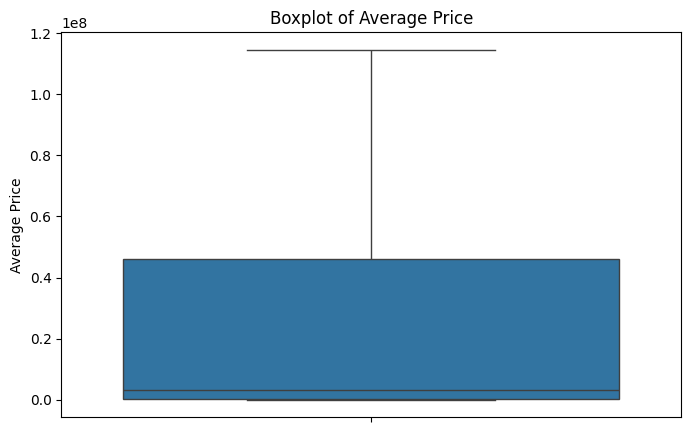

Number of outliers in average_price: 0


In [30]:
# Boxplot for average_price
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='average_price')
plt.title("Boxplot of Average Price")
plt.ylabel("Average Price")
plt.show()

# Identify rows with extreme outliers
q1 = df['average_price'].quantile(0.25)
q3 = df['average_price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['average_price'] < lower_bound) | (df['average_price'] > upper_bound)]
print(f"Number of outliers in average_price: {outliers.shape[0]}")

# Basic clean up

In [18]:
# Drop duplicates
df.drop_duplicates(subset=["processed_timestamp","type_id"], inplace=True)

In [19]:
# Cut the maximum price to 1.5 times the 90th percentile
q1 = df['average_price'].quantile(0.25)
q3 = df['average_price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df.loc[df['average_price'] > upper_bound, 'average_price'] = upper_bound